In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [162]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
print(train)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

In [163]:
data = pd.concat([train, test],ignore_index=True)
print(train.shape, test.shape, data.shape)

(614, 13) (367, 12) (981, 13)


In [164]:
data.describe(include="all")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,981,957,978,956,981,926,981.000000,981.000000,954.000000,961.000000,902.000000,981,614
unique,981,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001868,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,775,631,545,763,807,NaN,NaN,NaN,NaN,NaN,349,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5179.795107,1601.916330,142.511530,342.201873,0.835920,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,5695.104533,2718.772806,77.421743,65.100602,0.370553,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,9.000000,6.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2875.000000,0.000000,100.000000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3800.000000,1110.000000,126.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5516.000000,2365.000000,162.000000,360.000000,1.000000,NaN,NaN


In [165]:
Y=train.loc[:,"Loan_Status"]
print(Y)

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object


In [166]:
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [167]:
##Summing up of all missing values in the dataset 
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [168]:
#Replacing the missing value with mode (Categorical Data)
train['Gender'].fillna((train['Gender'].mode().values[0]), inplace=True)
train['Married'].fillna((train['Married'].mode().values[0]), inplace=True)
train['Dependents'].fillna((train['Dependents'].mode().values[0]), inplace=True)
train['Self_Employed'].fillna((train['Self_Employed'].mode().values[0]), inplace=True)

In [169]:
##Replacing the missing value with median
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].median(), inplace=True)
train['Credit_History'].fillna(train['Credit_History'].median(), inplace=True)

In [170]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [171]:
train.describe(include="all")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,614,614,614,614,614,614.000000,614.000000,614.000000,614.000000,614.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001868,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,502,401,360,480,532,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,145.752443,342.410423,0.855049,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,84.107233,64.428629,0.352339,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.250000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,164.750000,360.000000,1.000000,NaN,NaN


In [172]:
train["Dependents"]=train["Dependents"].apply(lambda x:str(x).replace("+","")if '+'in str(x)else str(x))
train["Dependents"]=train['Dependents'].apply(lambda x :float(x))

In [173]:

train['Gender'] = train['Gender'].map({'Female':0,'Male':1}).astype(np.int)
train['Married'] = train['Married'].map({'No':0, 'Yes':1}).astype(np.int)
train['Education'] = train['Education'].map({'Not Graduate':0, 'Graduate':1}).astype(np.int)
train['Self_Employed'] = train['Self_Employed'].map({'No':0, 'Yes':1}).astype(np.int)
train['Loan_Status'] = train['Loan_Status'].map({'N':0, 'Y':1}).astype(np.int)
train['Dependents'] = train['Dependents'].astype(np.int)

In [174]:
cleanup_nums = {'Property_Area':{'Urban':1, 'Semiurban':2,'Rural':3}}
train.replace(cleanup_nums, inplace=True)
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,1,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,3,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1


In [175]:
X=train.iloc[:,1:-1]
Y=train.loc[:,"Loan_Status"]

In [188]:
train.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int32
dtype: object

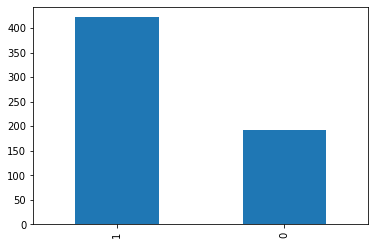

In [177]:
train['Loan_Status'].value_counts().plot.bar()
plt.show()

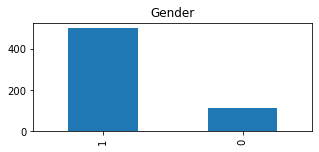

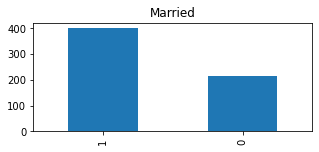

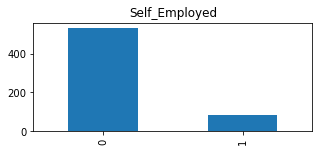

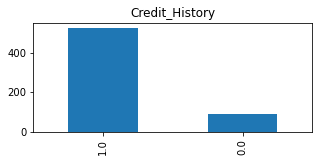

In [178]:
train['Gender'].value_counts().plot.bar(figsize=(5,2),title='Gender')
plt.show()
train['Married'].value_counts().plot.bar(figsize=(5,2),title='Married')
plt.show()
train['Self_Employed'].value_counts().plot.bar(figsize=(5,2),title='Self_Employed')
plt.show()
train['Credit_History'].value_counts().plot.bar(figsize=(5,2),title='Credit_History')
plt.show()

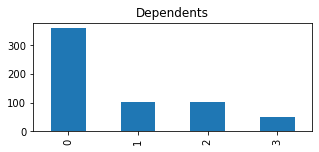

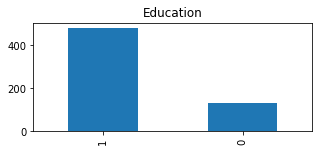

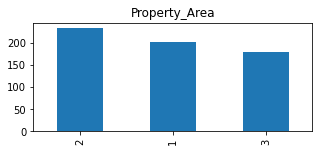

In [179]:
train['Dependents'].value_counts().plot.bar(figsize=(5,2),title='Dependents')
plt.show()
train['Education'].value_counts().plot.bar(figsize=(5,2),title='Education')
plt.show()
train['Property_Area'].value_counts().plot.bar(figsize=(5,2),title='Property_Area')
plt.show()

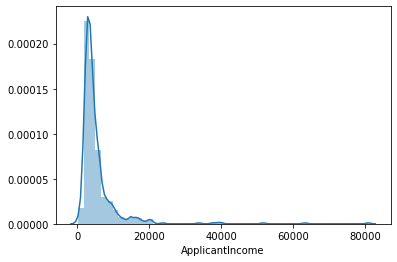

In [180]:
sns.distplot(train['ApplicantIncome'])

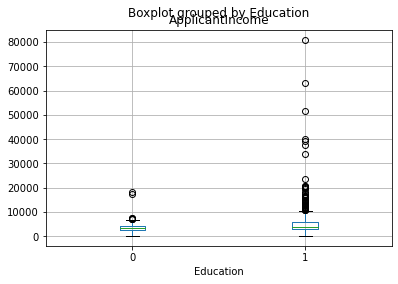

In [181]:
train.boxplot(column='ApplicantIncome',by='Education')


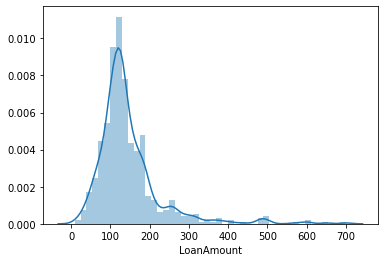

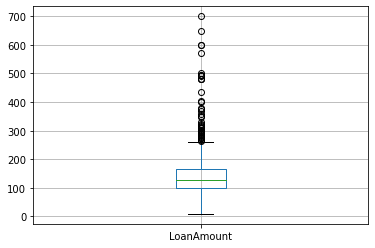

In [182]:
sns.distplot(train['LoanAmount'])
plt.show()
train.boxplot(column='LoanAmount')
plt.show()

In [183]:
ctg=pd.crosstab(train['Gender'],train['Loan_Status'])
ctd=pd.crosstab(train['Dependents'],train['Loan_Status'])
cte=pd.crosstab(train['Education'],train['Loan_Status'])
cts=pd.crosstab(train['Self_Employed'],train['Loan_Status']);

In [184]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [198]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_val)
print(y_pred)

[1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 0 0 1 1 1 0]


In [195]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_val, y_pred)
print(cm)
accuracy_score(y_val, y_pred)

[[ 20  23]
 [  2 109]]


0.8376623376623377